In [24]:
import numpy as np
            import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
import statsmodels.api as sm

In [18]:
def logistic(t):
    return 1/(1+math.exp(1.0-t))

In [19]:
t = np.linspace(-6,6, 500)

In [20]:
y = np.array([logistic(ele) for ele in t] )

Text(0.5, 1.0, 'Logistic Function')

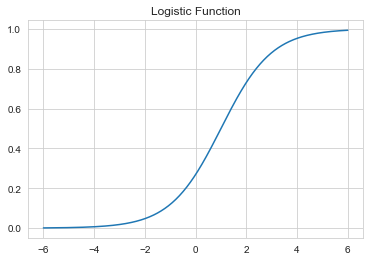

In [21]:
plt.plot(t,y)
plt.title("Logistic Function")

In [25]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [27]:
df["Hod_Affair"] = df["affairs"].apply(affair_check)

In [28]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Hod_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [29]:
df.groupby("Hod_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Hod_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


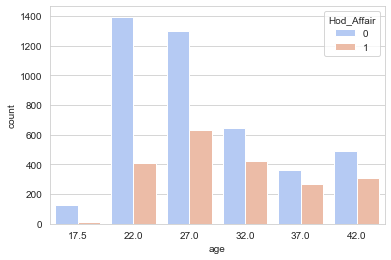

In [31]:
sns.countplot("age", data=df.sort_values("age"), hue="Hod_Affair", palette="coolwarm")

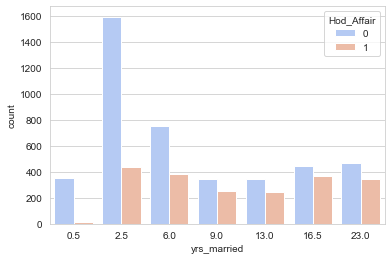

In [32]:
sns.countplot("yrs_married", data=df.sort_values("yrs_married"), hue="Hod_Affair", palette="coolwarm")

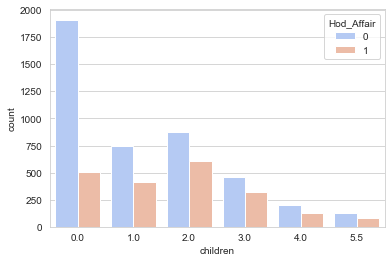

In [33]:
sns.countplot("children", data=df.sort_values("children"), hue="Hod_Affair", palette="coolwarm")

In [34]:
occ_dummies = pd.get_dummies(df["occupation"])
hus_occ_dummies = pd.get_dummies(df["occupation_husb"])

In [35]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [36]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [39]:
X = df.drop(["occupation", "occupation_husb", "Hod_Affair"], axis=1)

In [40]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [41]:
X=pd.concat([X,dummies], axis=1)

In [42]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [43]:
Y = df.Hod_Affair

In [44]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Hod_Affair, dtype: int64

In [46]:
X = X.drop(["occ1", "hocc1"], axis=1) 

In [47]:
X = X.drop("affairs", axis =1)

In [48]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [51]:
Y = np.ravel(Y)

In [52]:
log_model = LogisticRegression()

In [53]:
log_model.fit(X,Y)

/Users/tk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
log_model.score(X,Y)

0.7246308513980522

In [55]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [56]:
coeff_df

,0,1
0,rate_marriage,-0.676129
1,age,-0.0570199
2,yrs_married,0.0986186
3,children,0.0545863
4,religious,-0.369481
5,educ,0.019557
6,occ2,0.280649
7,occ3,0.61412
8,occ4,0.373506
9,occ5,0.895852


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [67]:
log_model2 = LogisticRegression(max_iter=1000)

In [68]:
log_model2.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [69]:
class_predict = log_model2.predict(X_test)

In [70]:
class_predict

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
from sklearn import metrics

In [71]:
metrics.accuracy_score(Y_test, class_predict)

0.7280150753768844